# Monte Carlo Simulation:

<b><h3>What is Monte Carlo simulation?</h3></b><br>
In forecasting and decision-making, the Monte Carlo approach is a computerised mathematical tool that enables humans to quantitatively account for risk. The Monte Carlo method, at its heart, is a technique for investigating the behaviour of complicated systems using random samples of parameter values. To comprehend the effects of risk and uncertainty, a Monte Carlo simulation is used to address a wide range of problems in a variety of different domains.
<br>

<b><h3>Monte Carlo vs. Other Predictive Models</h3></b><br>
The impact of risk has been evaluated using Monte Carlo simulations in a variety of real-world situations, including project management, AI, and stock prices. The Monte Carlo method has a number of advantages over predictive models with fixed inputs, including the capacity to perform sensitivity analysis and determine the correlation of inputs.
<br><br><br>

<b><h3>Applications of Monte Carlo Simulations:</h3></b><br>
Finance & Banking<br>
Energy & Utilities <br>
Manufacturing & Consumer Goods<br>
Construction & Engineering<br>
Insurance & Reinsurance<br>
Logistics & Transportation<br>
Environmental Conservation<br>
Aerospace & Defense<br>
Healthcare & Pharmaceuticals<br>
Agriculture & Food Safety<br>
Consulting & Legal<br>
Entertainment, Sports & Media<br>
Mining & Minerals<br>
Technology & Telecommunication<br>
<br><br>
<b><h3>How Monte Carlo Simulation Works?</h3></b><br>
By creating models of potential outcomes and replacing every factor that has intrinsic uncertainty with a range of values (referred to as a probability distribution), Monte Carlo simulation does risk analysis. Then, using a new set of random values drawn from the input probability distributions, it repeatedly calculates the outcomes. Before it is finished, a Monte Carlo simulation may require thousands or even tens of thousands of recalculations, depending on the number of uncertainty and the ranges assigned to them. A Monte Carlo simulation yields a distribution, or range, of potential outcome values. You can use this information on potential outcomes to determine the likelihood of various outcomes in your projections and to carry out a variety of other analysis.

We can describe the various possible values for these variables along with their likelihood of occurring by using probability distributions for unknown inputs. In comparison to traditional "best guess" or "best/worst/most likely" analyses, probability distributions are a far more realistic way to describe uncertainty in variables in a risk analysis.
<br><br>
<b>In this case we have used Normal Distribution for simulating Percentage Change Values.</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temp_ongc = pd.read_csv("ONGC new.csv")
temp_ntpc = pd.read_csv("NTPC new.csv")
temp_gail = pd.read_csv("GAIL new.csv")
data_ongc = temp_ongc.iloc[:501,-1:]
data_ntpc = temp_ntpc.iloc[:501,-1:]
data_gail = temp_gail.iloc[:501,-1:]

In [3]:
data = pd.concat([data_ongc, data_ntpc, data_gail], axis = 1, ignore_index=True)
data.columns=['ONGC', 'NTPC', 'GAIL']
data

,ONGC,NTPC,GAIL
0,259.82,158.32,386.67
1,261.71,160.31,390.24
2,265.74,159.77,393.56
3,264.53,158.42,381.71
4,255.79,156.61,379.77
...,...,...,...
496,287.75,137.92,340.40
497,292.14,137.99,340.50
498,291.84,137.63,340.09
499,289.69,136.55,343.11


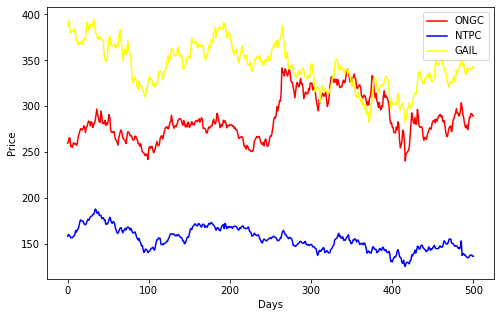

In [4]:
plt.figure(figsize=(8,5))
plt.plot(data['ONGC'], color = 'red')
plt.plot(data['NTPC'], color = 'blue')
plt.plot(data['GAIL'], color = 'yellow')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['ONGC','NTPC','GAIL'])
plt.show()

In [5]:
# calculating pct change and mean pct change
pct_change = data[["ONGC", "NTPC", "GAIL"]].pct_change()
mean_pct_change = pct_change.mean()
mean_pct_change

ONGC    0.000353
NTPC   -0.000196
GAIL   -0.000140
dtype: float64

# ONGC simulation for different initial values

In [6]:
starting_prices = np.random.normal(259.82,1,1000) # randomly generating values between with 148 mean and SD=1 for starting price
total_days = 501
ONGC_pct_change = pct_change['ONGC']

arr = np.full((len(starting_prices), total_days), 1.0) #array to store new prices

for i in range(len(starting_prices)):
    for j in range(total_days):
        if j==0:
            arr[i][j]=starting_prices[i]  #using initial starting price to compute first value
        else:
            arr[i][j]=arr[i][j-1] + arr[i][j-1] * ONGC_pct_change[j]  #computing using just previous value

            
ONGC = pd.DataFrame(arr)
ONGC.set_axis(labels = [x for x in starting_prices], axis = 0, inplace=True)
ONGC

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
258.411527,258.411527,260.291281,264.299435,263.095994,254.403373,255.129416,254.134837,258.719846,258.491093,257.327436,...,274.921539,277.895330,273.071622,279.208174,286.438764,286.190119,290.556321,290.257948,288.119603,287.980362
261.311083,261.311083,263.211930,267.265058,266.048114,257.257956,257.992145,256.986406,261.622863,261.391543,260.214828,...,278.006349,281.013509,276.135675,282.341084,289.652806,289.401371,293.816565,293.514843,291.352505,291.211701
259.515393,259.515393,261.403177,265.428452,264.219871,255.490117,256.219262,255.220434,259.825029,259.595299,258.426671,...,276.095931,279.082426,274.238112,280.400878,287.662355,287.412648,291.797502,291.497853,289.350374,289.210538
258.478422,258.478422,260.358663,264.367854,263.164102,254.469231,255.195461,254.200625,258.786821,258.558009,257.394050,...,274.992708,277.967269,273.142312,279.280453,286.512915,286.264205,290.631538,290.333087,288.194188,288.054911
260.709169,260.709169,262.605637,266.649429,265.435288,256.665377,257.397876,256.394453,261.020230,260.789443,259.615439,...,277.365978,280.366211,275.499613,281.690728,288.985608,288.734752,293.139776,292.838749,290.681392,290.540913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260.388280,260.388280,262.282414,266.321228,265.108582,256.349466,257.081062,256.078875,260.698958,260.468455,259.295896,...,277.024588,280.021128,275.160520,281.344015,288.629916,288.379369,292.778971,292.478315,290.323612,290.183306
259.459119,259.459119,261.346494,265.370897,264.162577,255.434717,256.163703,255.165092,259.768689,259.539008,258.370633,...,276.036063,279.021910,274.178646,280.340076,287.599978,287.350326,291.734228,291.434645,289.287631,289.147825
259.108973,259.108973,260.993801,265.012772,263.806083,255.090001,255.818004,254.820740,259.418124,259.188754,258.021956,...,275.663545,278.645362,273.808635,279.961750,287.211855,286.962539,291.340525,291.041346,288.897230,288.757613
259.780966,259.780966,261.670682,265.700076,264.490258,255.751571,256.481462,255.481612,260.090919,259.860954,258.691130,...,276.378472,279.368023,274.518751,280.687824,287.956732,287.706770,292.096110,291.796155,289.646478,289.506499


In [7]:
mean_values = pd.DataFrame(ONGC.values.mean(axis = 0))
mean_values.head()

,0
0,259.803776
1,261.693658
2,265.723407
3,264.513482
4,255.774028


In [8]:
# evaluating performance using MSE
y_predicted = mean_values.values
y_true = data['ONGC'].values
percentage_error = ((abs(y_true-y_predicted)/y_true)*100).mean()
percentage_error

9.114702437944821

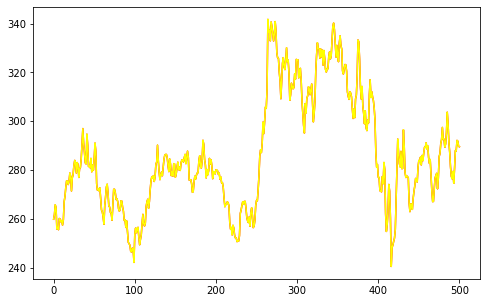

<Figure size 3600x3600 with 0 Axes>

In [9]:
plt.figure(figsize= (8,5))
plt.plot(y_predicted, color = 'red')
plt.plot(y_true, color = 'yellow')
plt.figure(figsize=(50,50))
plt.show()

# PCT Change
Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row.
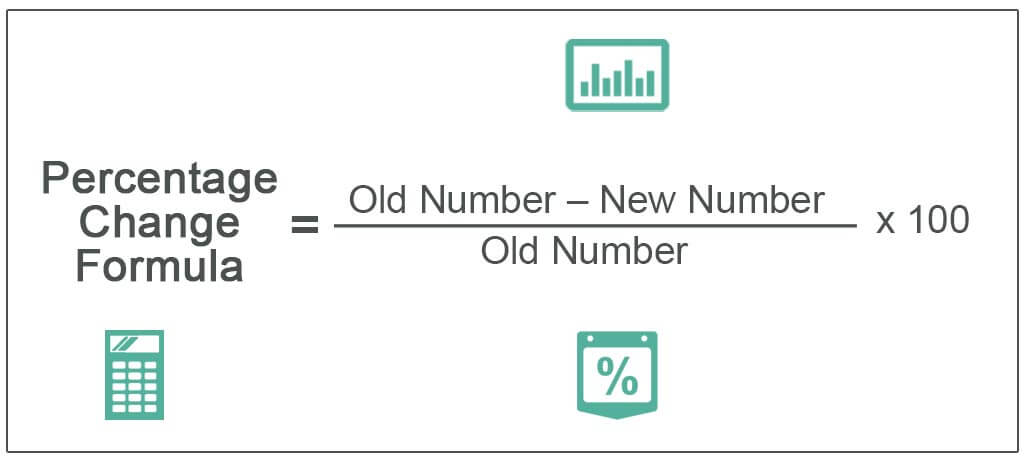 [2]

In [10]:
returns = np.log(1 + pct_change)
returns.head()

,ONGC,NTPC,GAIL
0,NaN,NaN,NaN
1,0.007248,0.012491,0.009190
2,0.015281,-0.003374,0.008472
3,-0.004564,-0.008486,-0.030572
4,-0.033598,-0.011491,-0.005095


# Mean:

In mathematics and statistics, the idea of mean is crucial. The most typical or average value among a group of numbers is called the mean. It is a statistical measure of a probability distribution's central tendency along the median and mode. It also goes by the name "expected value."
<br>
Different Means:

<b>Mathematical Mean</b>
<b>Geometric Mean</b>
<b>Harmonic Mean</b>

We used the arithmetic mean in this case:
<b>Arithmetic Mean:</b><br>
Arithmetic mean is the result of summing all the values and dividing by the total number of values. To compute, simply sum up all the numbers provided, then divide by the number of numbers given.
<br>
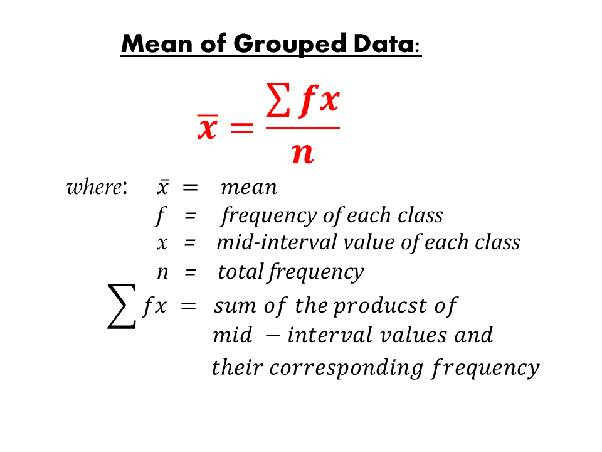 [3]

In [11]:
mean_returns = returns.mean()
mean_returns

ONGC    0.000217
NTPC   -0.000294
GAIL   -0.000242
dtype: float64

# Standard Deviation:

<b>What is Standard Deviation?</b><br>
The square root of the variance is used to calculate the standard deviation, a statistic that expresses how widely distributed a dataset is in relation to its mean. Calculating each data point's deviation from the mean may determine the standard deviation.
<br>
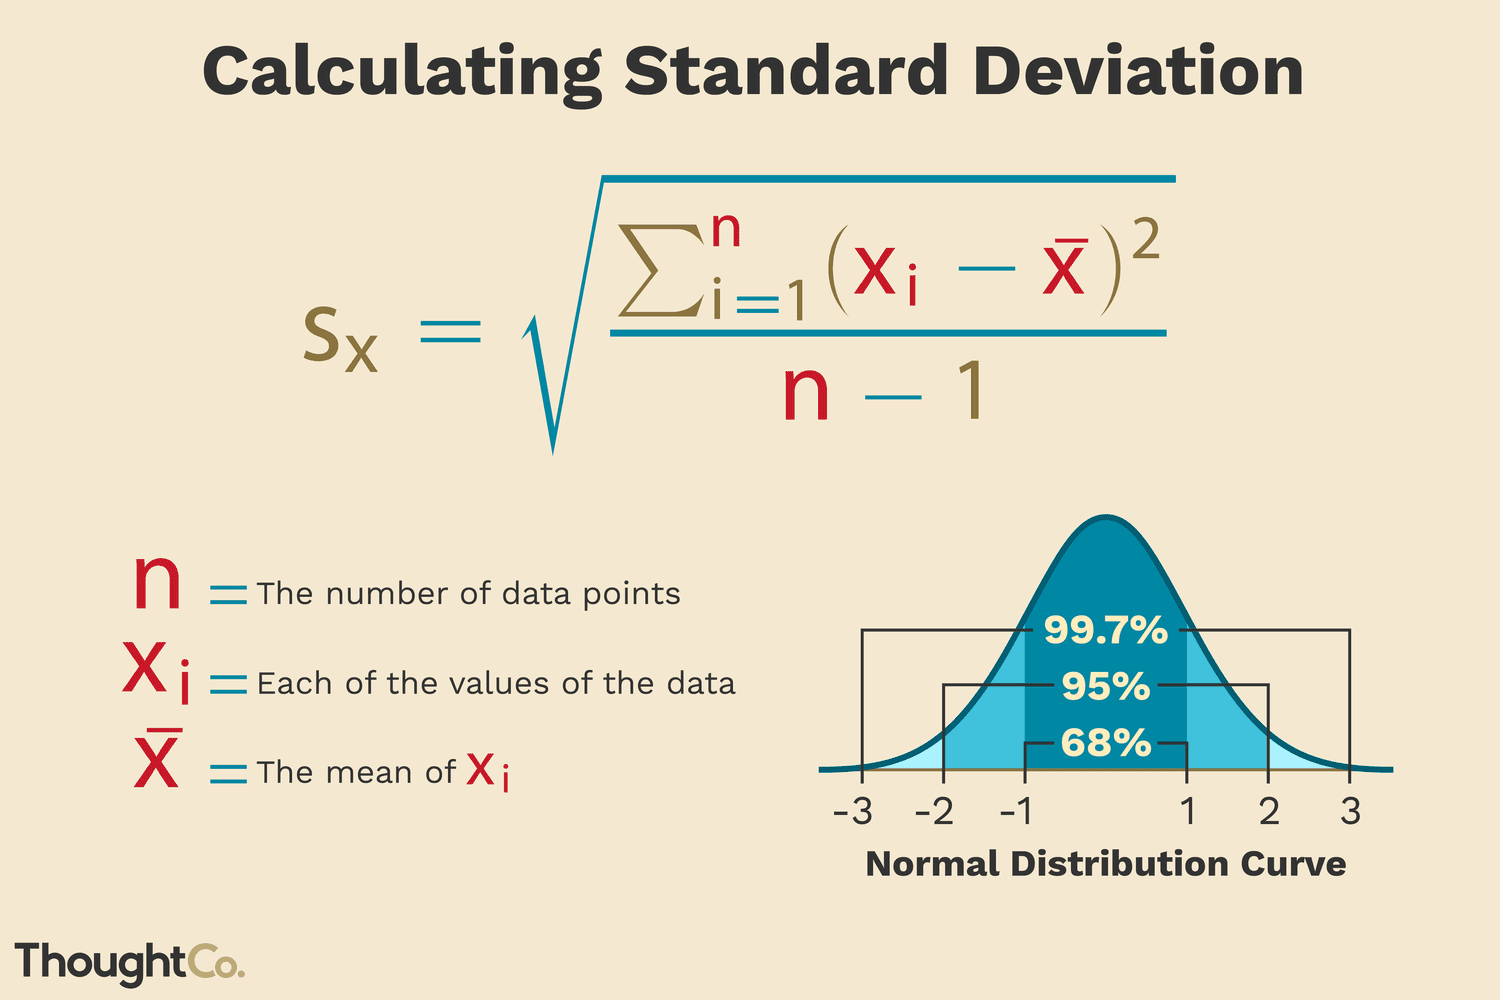<br>[1]
<br>
<b>What Does Standard Deviation Tell You?</b><br>
Standard deviation describes how dispersed a set of data is. It compares each data point to the mean of all data points, and standard deviation returns a calculated value that describes whether the data points are in close proximity or whether they are spread out. In a normal distribution, standard deviation tells you how far values are from the mean.
<br><br>
<b>Why Is Standard Deviation Important?</b><br>
Standard deviation is important because it can help users assess risk. Consider an investment option with an average annual return of 10% per year. However, this average was derived from the past three year returns of 50%, -15%, and -5%. By calculating the standard deviation and understanding your low likelihood of actually averaging 10% in any single given year, you're better armed to make informed decisions and recognizing underlying risk.

In [12]:
std_returns = returns.std()
std_returns

ONGC    0.016547
NTPC    0.014004
GAIL    0.014273
dtype: float64

# Normal Distribution:

The normal distribution, also known as the Gaussian distribution, is the most important probability distribution in statistics for independent, random variables. Most people recognize its familiar bell-shaped curve in statistical reports.

The normal distribution is a continuous probability distribution that is symmetrical around its mean, most of the observations cluster around the central peak, and the probabilities for values further away from the mean taper off equally in both directions. Extreme values in both tails of the distribution are similarly unlikely. While the normal distribution is symmetrical, not all symmetrical distributions are normal. For example, the Student’s t, Cauchy, and logistic distributions are symmetric.

As with any probability distribution, the normal distribution describes how the values of a variable are distributed. It is the most important probability distribution in statistics because it accurately describes the distribution of values for many natural phenomena. Characteristics that are the sum of many independent processes frequently follow normal distributions. For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution.<br><br>
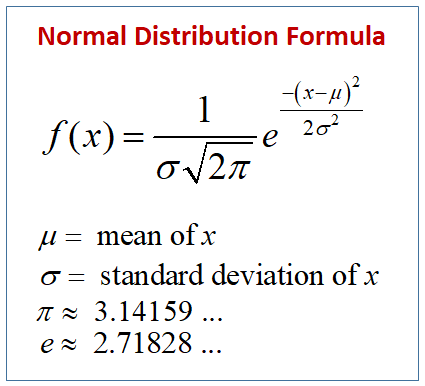 [4]

In [13]:
# random normal returns with mean = mean_returns and std = std_returns for all three companies.
simulated_returns = 1 + np.random.normal(mean_returns, std_returns, size = (total_days,3))
simulated_returns = pd.DataFrame(simulated_returns, columns=["ONGC", "NTPC", "GAIL"])
simulated_returns

,ONGC,NTPC,GAIL
0,0.975121,1.013541,0.998233
1,1.014930,0.993999,1.006819
2,1.005757,1.013035,0.964018
3,0.982012,0.968338,0.995079
4,0.995088,0.996696,0.999265
...,...,...,...
496,0.970651,0.995377,1.015618
497,0.985159,0.988401,0.986407
498,0.993289,0.997295,0.998142
499,1.000280,0.997175,1.022594


In [14]:
ONGC_returns = simulated_returns.iloc[:, 0]
NTPC_returns = simulated_returns.iloc[:, 1]
GAIL_returns = simulated_returns.iloc[:, 2]

# chosing last day price from dataset as initial value for prediction.
ONGC_initial_value = data["ONGC"].iloc[-1]
NTPC_initial_value = data["NTPC"].iloc[-1]
GAIL_initial_value = data["GAIL"].iloc[-1]

In [15]:
prediction_ONGC = pd.DataFrame(ONGC_initial_value * ONGC_returns.cumprod(), columns=['ONGC'])
prediction_NTPC = pd.DataFrame(NTPC_initial_value * NTPC_returns.cumprod(), columns=['NTPC'])
prediction_GAIL = pd.DataFrame(GAIL_initial_value * GAIL_returns.cumprod(), columns=['GAIL'])

In [16]:
predictions = pd.concat([prediction_ONGC, prediction_NTPC, prediction_GAIL], axis = 1, ignore_index=False)
predictions

,ONGC,NTPC,GAIL
0,282.346364,138.551058,342.034490
1,286.561659,137.719588,344.366751
2,288.211454,139.514777,331.975877
3,283.027143,135.097505,330.342103
4,281.636888,134.651123,330.099365
...,...,...,...
496,253.601616,84.638580,247.828967
497,249.837879,83.656856,244.460127
498,248.161293,83.430573,244.005929
499,248.230902,83.194884,249.519104


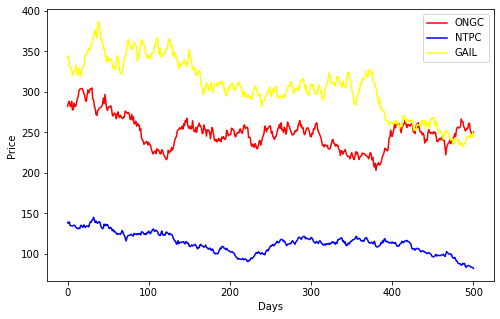

In [17]:
plt.figure(figsize=(8,5))
plt.plot(predictions['ONGC'], color = 'red')
plt.plot(predictions['NTPC'], color = 'blue')
plt.plot(predictions['GAIL'], color = 'yellow')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['ONGC','NTPC','GAIL'])
plt.show()

In [18]:
ongc_data = temp_ongc.iloc[:,1:]
ongc_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP
0,256.60,257.50,262.85,256.45,258.60,258.35,259.82
1,258.35,261.10,264.50,259.65,263.80,263.20,261.71
2,263.20,264.00,267.60,261.10,266.30,266.70,265.74
3,266.70,268.45,269.95,261.00,262.05,261.75,264.53
4,261.75,256.40,258.40,253.65,255.85,255.65,255.79


In [19]:
independent_parameters = ongc_data.iloc[:,:6]
dependent_parameter = ongc_data.iloc[:,-1]

# Correlation Formula


<b>How does correlation work?</b>

A statistical metric known as correlation describes how closely two variables are connected linearly. (meaning they change together at a constant rate). It's a typical technique for expressing straightforward connections without explicitly stating cause and consequence.
How is the correlation calculated?
The strength of the association is measured by the sample correlation coefficient, or r. The statistical significance of correlations is also examined.

<b>What are some of correlation analysis' drawbacks?</b>

Correlation cannot examine the presence or impact of other factors beyond the two under investigation. It's important to note that correlation cannot explain causation and effect. Curvilinear connections cannot be adequately described by correlation.

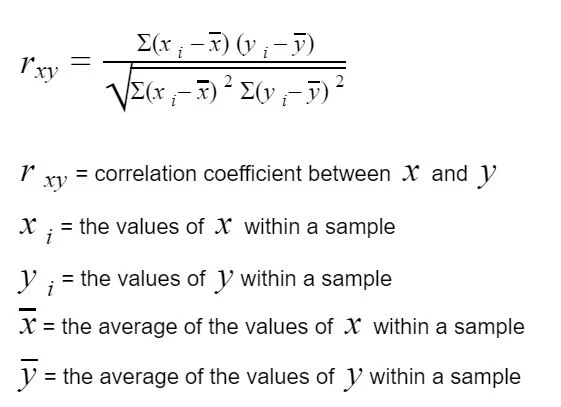 [5]

<AxesSubplot:>

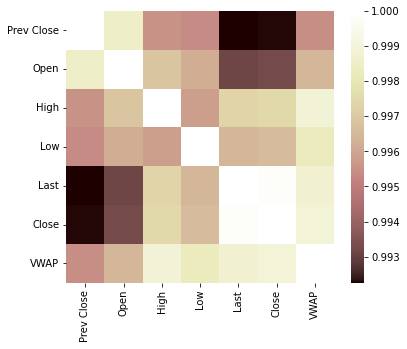

In [20]:
plt.figure(figsize=(6,5))
sns.heatmap(ongc_data.corr(), annot=False, cmap='pink')

## Conclusion: VWAP depends nearly on all the independent parameters.
##### Since all are having correlation value in range (0.993, 0.999)

In [21]:
x_train = independent_parameters.iloc[:501,:]
y_train = dependent_parameter.iloc[:501]

# Linear Regression Model for Predictions:

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

<b><h3>Types of Linear Regression:</h3></b><br>
Linear regression can be further divided into two types of the algorithm:

<b>Simple Linear Regression:</b><br>
If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.<br><br>
<b>Multiple Linear regression:</b><br>
If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.

<h2>In this case we have used Multiple Linear Regression.</h2>

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_

array([ 0.02504623,  0.00697272,  0.3604232 ,  0.22975417, -0.09677132,
        0.4761617 ])

In [23]:
x_test = independent_parameters.iloc[501:993,:]
y_test = dependent_parameter.iloc[501:993]
y_predicted_model = model.predict(x_test)
error = ((y_test - y_predicted_model)**2).mean()
error

1.3241865601535558

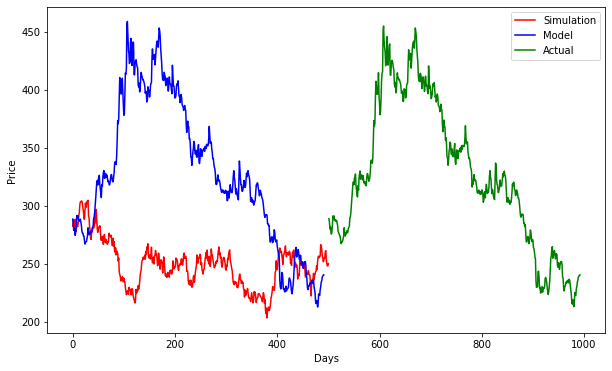

In [24]:
plt.figure(figsize=(10,6))
plt.plot(predictions['ONGC'], color = 'red')
plt.plot(y_predicted_model, color = 'blue')
plt.plot(y_test, color = 'green')
plt.legend(['Simulation', "Model", 'Actual'])
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# Conclusions: 
There is slight change in the Stock Prices predicted by linear model and Simulations. The prices predicted by linear model are similar to the actual prices, giving Mean Square Error of <b>1.32</b>. 
The reason for difference in this error can be the consideration of independent parameters in linear model and which were not taken into account in performing Monte Carlo Simulations.

# Rereferences:

1. https://www.thoughtco.com/thmb/qmSnmY_b1ztjvvdp-QhdT4-DA8c=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/calculate-a-sample-standard-deviation-3126345-v4-CS-01-5b76f58f46e0fb0050bb4ab2.png
<br><br>
2. https://cdn.wallstreetmojo.com/wp-content/uploads/2019/11/Percentage-Change-Formula-1.jpg
<br><br>
3. https://qph.cf2.quoracdn.net/main-qimg-cb5a6703bdfd5e2a15cf8865607a1590
<br><br>
4. https://www.onlinemathlearning.com/image-files/normal-distribution-formula.png
<br><br>
5. https://v.fastcdn.co/u/11443291/57605682-0-correlation-formula-.JPG